In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/Users/paula/.pyenv/versions/3.8.6/envs/mri_personality/lib/python3.8/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:

master=pd.read_excel('master_dup_removed.xlsx')
master.head()

,participant_id,age,sex,BMI,handedness,education_category,NEO_N,NEO_E,NEO_O,NEO_A,...,CC_Mid_Anterior,CC_Anterior,CortexVol,CerebralWhiteMatterVol,SubCortGrayVol,TotalGrayVol,MaskVol-to-eTIV,lhSurfaceHoles,rhSurfaceHoles,SurfaceHoles
0,sub-0001,26.25,F,24.0,right,applied,35,44,37,39,...,474.1,954.7,431722.308490,412508.155809,52096,579143.308490,1.104817,12,15,27
1,sub-0002,21.00,F,23.0,right,academic,27,53,40,48,...,534.4,1007.6,551229.524399,511140.955357,61775,729961.524399,0.946018,12,3,15
2,sub-0003,23.00,M,22.0,right,academic,35,40,43,37,...,624.5,875.2,484203.743223,488806.827011,55089,666343.743223,1.121519,7,8,15
3,sub-0004,23.50,F,22.0,right,applied,29,47,41,48,...,488.8,952.1,490562.774910,424675.040008,57767,666421.774910,1.046196,14,9,23
4,sub-0005,21.75,M,19.0,ambidextrous,applied,26,35,40,38,...,683.6,941.4,549885.250985,473013.916100,60987,723713.250985,0.981137,17,12,29


In [3]:
master.shape

(1362, 136)

In [28]:
test_master=pd.read_excel('master_dup_removed.xlsx')

## Notes about the data
1- Sex column has F-M and female-male

2- Age doesn't look normally distributed --> Scaling

3- Is education level proportional to general population? Does it matter?

4- NEO-E Skewed norm dist

5- Only NeoC has a null value (1)


In [5]:
master['lh_bankssts_thickness'].isnull().sum()

0

<AxesSubplot:xlabel='NEO_N', ylabel='Count'>

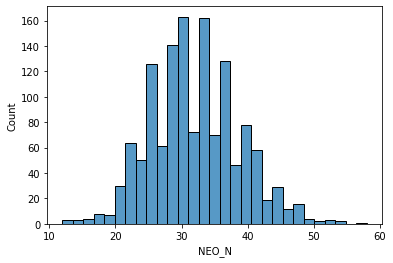

In [6]:
import seaborn as sns
sns.histplot(master['NEO_N'])

In [7]:
master.describe()

,age,BMI,NEO_N,NEO_E,NEO_O,NEO_A,NEO_C,lh_bankssts_thickness,lh_caudalanteriorcingulate_thickness,lh_caudalmiddlefrontal_thickness,...,CC_Mid_Anterior,CC_Anterior,CortexVol,CerebralWhiteMatterVol,SubCortGrayVol,TotalGrayVol,MaskVol-to-eTIV,lhSurfaceHoles,rhSurfaceHoles,SurfaceHoles
count,1353.000000,1353.000000,1362.000000,1362.000000,1362.000000,1362.000000,1361.000000,1362.000000,1362.000000,1362.000000,...,1362.000000,1362.000000,1362.000000,1362.000000,1362.000000,1362.000000,1362.000000,1362.000000,1362.000000,1362.000000
mean,22.611604,23.452328,32.044053,42.367841,41.140969,41.480910,39.625276,2.612562,2.834280,2.668168,...,624.399192,963.657562,505229.693427,473428.713726,60587.881791,682682.797686,0.982964,21.950808,21.265786,43.216593
std,1.768582,4.461636,6.673963,5.752341,6.254869,5.790108,6.724346,0.150417,0.215096,0.148599,...,154.322225,158.217013,50983.978778,56343.418310,5150.041764,63571.059593,0.113214,12.559680,11.654838,23.134134
min,18.250000,0.000000,12.000000,19.000000,22.000000,25.000000,19.000000,2.112000,2.226000,2.214000,...,319.900000,401.700000,365486.667586,342083.173660,46019.000000,504960.667586,0.839635,0.000000,0.000000,3.000000
25%,21.250000,21.000000,27.000000,38.000000,37.000000,37.250000,35.000000,2.509000,2.685250,2.565000,...,508.750000,853.950000,469216.989462,432865.675953,56841.250000,636360.663303,0.900092,13.000000,12.000000,26.000000
50%,22.500000,23.000000,32.000000,43.000000,41.000000,42.000000,39.000000,2.611000,2.823000,2.671000,...,600.150000,951.350000,502938.890146,468810.834881,60534.500000,679474.039146,0.930576,20.000000,20.000000,41.500000
75%,24.000000,25.000000,36.000000,47.000000,46.000000,46.000000,44.000000,2.709000,2.968750,2.770750,...,717.075000,1057.650000,538850.629653,509955.141002,64040.250000,727203.990361,1.053637,29.000000,28.000000,56.000000
max,26.250000,47.000000,58.000000,58.000000,58.000000,58.000000,59.000000,3.164000,3.663000,3.169000,...,1482.400000,1614.400000,687593.232218,666177.675324,79412.000000,900769.417400,1.430946,120.000000,106.000000,226.000000


<AxesSubplot:xlabel='NEO_C', ylabel='Count'>

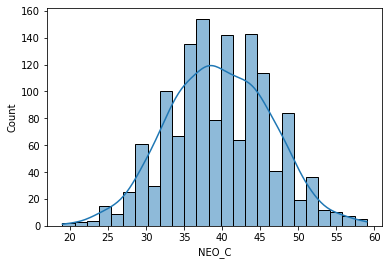

In [8]:
sns.histplot(test_master['NEO_C'],kde='True')

/Users/paula/.pyenv/versions/3.8.6/envs/mri_personality/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


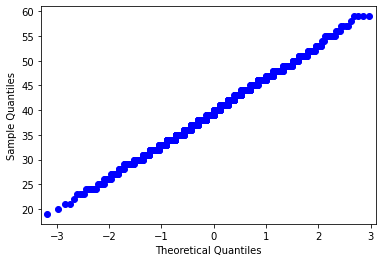

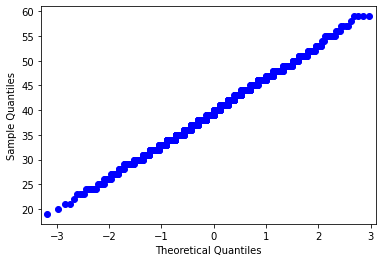

In [9]:
from statsmodels.graphics.gofplots import qqplot
qqplot(test_master['NEO_C'])

In [10]:
from scipy.stats import shapiro
stat, p = shapiro(test_master['NEO_C'])
p

1.0

In [11]:
from scipy.stats import normaltest
stat, p = normaltest(test_master['NEO_C'])
stat

nan

In [29]:
norm_y=test_master[['NEO_N','NEO_C','NEO_A','NEO_E','NEO_O']]

In [13]:
stat, p = normaltest(norm_y)
p

array([1.08909146e-03,            nan, 1.05964667e-02, 1.48356568e-07,
       1.90207931e-03])

## Finding clusters

In [3]:
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA


### K Means clusters

In [4]:
clusters = KMeans(n_clusters=4)

In [5]:
y=master[['NEO_N','NEO_C','NEO_A','NEO_E','NEO_O']]
y

,NEO_N,NEO_C,NEO_A,NEO_E,NEO_O
0,35,48.0,39,44,37
1,27,34.0,48,53,40
2,35,38.0,37,40,43
3,29,41.0,48,47,41
4,26,45.0,38,35,40
...,...,...,...,...,...
1357,40,32.0,38,39,47
1358,28,40.0,34,41,48
1359,27,45.0,41,44,46
1360,35,41.0,45,32,44


In [6]:
cat_y=master[['NEO_N','NEO_C','NEO_A','NEO_E','NEO_O']]

In [7]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
y=pd.DataFrame(imputer.fit_transform(y),columns=y.columns)
y

,NEO_N,NEO_C,NEO_A,NEO_E,NEO_O
0,35.0,48.0,39.0,44.0,37.0
1,27.0,34.0,48.0,53.0,40.0
2,35.0,38.0,37.0,40.0,43.0
3,29.0,41.0,48.0,47.0,41.0
4,26.0,45.0,38.0,35.0,40.0
...,...,...,...,...,...
1357,40.0,32.0,38.0,39.0,47.0
1358,28.0,40.0,34.0,41.0,48.0
1359,27.0,45.0,41.0,44.0,46.0
1360,35.0,41.0,45.0,32.0,44.0


In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(y)


StandardScaler()

In [9]:
y = pd.DataFrame(scaler.transform(y), columns=y.columns)
y

,NEO_N,NEO_C,NEO_A,NEO_E,NEO_O
0,0.443070,1.246413,-0.428631,0.283842,-0.662282
1,-0.756058,-0.837097,1.126315,1.848997,-0.182480
2,0.443070,-0.241809,-0.774175,-0.411782,0.297323
3,-0.456276,0.204658,1.126315,0.805561,-0.022546
4,-0.905949,0.799947,-0.601403,-1.281313,-0.182480
...,...,...,...,...,...
1357,1.192525,-1.134742,-0.601403,-0.585688,0.937059
1358,-0.606167,0.055836,-1.292490,-0.237876,1.096993
1359,-0.756058,0.799947,-0.083088,0.283842,0.777125
1360,0.443070,0.204658,0.607999,-1.803031,0.457257


In [10]:
clusters.fit(y)

KMeans(n_clusters=4)

In [11]:
clusters.fit_transform(y)

array([[2.67648342, 1.77817148, 1.75946168, 2.27847865],
       [3.12945127, 2.14199385, 3.25432   , 2.84381036],
       [1.55660162, 2.37851053, 1.45671135, 1.01198784],
       ...,
       [2.50584306, 1.10117088, 2.32781035, 1.92889597],
       [1.583602  , 2.83588917, 1.97667574, 2.89282465],
       [2.00214134, 1.40822378, 1.70138934, 1.44128773]])

In [12]:
centers=pd.DataFrame(scaler.inverse_transform(clusters.cluster_centers_),columns=y.columns)
centers

,NEO_N,NEO_C,NEO_A,NEO_E,NEO_O
0,38.549618,35.381679,44.927481,39.061069,44.828244
1,27.013793,45.264368,44.859770,46.057471,41.004598
2,32.284058,39.272464,40.089855,37.866667,35.347826
3,33.296875,35.812500,35.565625,44.912500,44.553125


In [13]:
clusters.labels_

array([2, 1, 3, ..., 1, 0, 1], dtype=int32)

In [14]:
target_label=clusters.labels_

In [15]:
master['target']=target_label
master

,participant_id,age,sex,BMI,handedness,education_category,NEO_N,NEO_E,NEO_O,NEO_A,...,CC_Anterior,CortexVol,CerebralWhiteMatterVol,SubCortGrayVol,TotalGrayVol,MaskVol-to-eTIV,lhSurfaceHoles,rhSurfaceHoles,SurfaceHoles,target
0,sub-0001,26.25,F,24.0,right,applied,35,44,37,39,...,954.7,431722.308490,412508.155809,52096,579143.308490,1.104817,12,15,27,2
1,sub-0002,21.00,F,23.0,right,academic,27,53,40,48,...,1007.6,551229.524399,511140.955357,61775,729961.524399,0.946018,12,3,15,1
2,sub-0003,23.00,M,22.0,right,academic,35,40,43,37,...,875.2,484203.743223,488806.827011,55089,666343.743223,1.121519,7,8,15,3
3,sub-0004,23.50,F,22.0,right,applied,29,47,41,48,...,952.1,490562.774910,424675.040008,57767,666421.774910,1.046196,14,9,23,1
4,sub-0005,21.75,M,19.0,ambidextrous,applied,26,35,40,38,...,941.4,549885.250985,473013.916100,60987,723713.250985,0.981137,17,12,29,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1357,sub-1358,22.25,male,21.0,right,medium,40,39,47,38,...,887.2,517851.745617,517310.502374,66447,711842.745617,0.921517,19,23,42,0
1358,sub-1359,25.25,male,30.0,right,medium,28,41,48,34,...,853.7,519398.357112,565436.699430,65260,718521.357112,0.933091,20,34,54,3
1359,sub-1360,20.75,male,22.0,right,high,27,44,46,41,...,1128.7,567440.125601,469283.579026,61988,756582.125601,0.881901,20,33,53,1
1360,sub-1361,24.25,female,35.0,right,medium,35,32,44,45,...,1005.8,441752.267831,442438.198680,55159,595460.267831,1.003723,31,34,65,0


In [17]:
master.target.value_counts()

1    435
2    345
3    320
0    262
Name: target, dtype: int64

### Gaussian clusters

In [19]:
from sklearn.mixture import GaussianMixture
gaussian_clusters = GaussianMixture(n_components=4, random_state=0)

In [20]:
gaussian_clusters.fit(y)

GaussianMixture(n_components=4, random_state=0)

In [21]:
gaussian_clusters.means_

array([[ 8.09740455e-01, -3.67522242e-01,  5.76569289e-01,
        -6.03784000e-01,  3.40070947e-01],
       [ 5.84423866e-02, -4.10553529e-01, -6.85083232e-01,
         3.52879589e-01,  4.32475070e-01],
       [-8.44152795e-02,  2.84759346e-03, -3.22731145e-01,
        -4.91135178e-01, -6.56606727e-01],
       [-5.22118205e-01,  6.07138887e-01,  5.10281204e-01,
         5.55823338e-01, -5.46131506e-04]])

In [22]:
gaussian_centers=pd.DataFrame(scaler.inverse_transform(gaussian_clusters.means_),columns=y.columns)
gaussian_centers

,NEO_N,NEO_C,NEO_A,NEO_E,NEO_O
0,37.446246,37.155277,44.818083,38.895945,43.267287
1,32.433952,36.866131,37.515661,44.396980,43.845051
2,31.480875,39.643951,39.612948,39.543702,37.035488
3,28.560735,43.704443,44.434409,45.563953,41.137554


In [23]:
gaussian_target=gaussian_clusters.predict(y)

In [24]:
master['gaussian_target']=gaussian_target
master

,participant_id,age,sex,BMI,handedness,education_category,NEO_N,NEO_E,NEO_O,NEO_A,...,CortexVol,CerebralWhiteMatterVol,SubCortGrayVol,TotalGrayVol,MaskVol-to-eTIV,lhSurfaceHoles,rhSurfaceHoles,SurfaceHoles,target,gaussian_target
0,sub-0001,26.25,F,24.0,right,applied,35,44,37,39,...,431722.308490,412508.155809,52096,579143.308490,1.104817,12,15,27,2,3
1,sub-0002,21.00,F,23.0,right,academic,27,53,40,48,...,551229.524399,511140.955357,61775,729961.524399,0.946018,12,3,15,1,3
2,sub-0003,23.00,M,22.0,right,academic,35,40,43,37,...,484203.743223,488806.827011,55089,666343.743223,1.121519,7,8,15,3,1
3,sub-0004,23.50,F,22.0,right,applied,29,47,41,48,...,490562.774910,424675.040008,57767,666421.774910,1.046196,14,9,23,1,3
4,sub-0005,21.75,M,19.0,ambidextrous,applied,26,35,40,38,...,549885.250985,473013.916100,60987,723713.250985,0.981137,17,12,29,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1357,sub-1358,22.25,male,21.0,right,medium,40,39,47,38,...,517851.745617,517310.502374,66447,711842.745617,0.921517,19,23,42,0,1
1358,sub-1359,25.25,male,30.0,right,medium,28,41,48,34,...,519398.357112,565436.699430,65260,718521.357112,0.933091,20,34,54,3,1
1359,sub-1360,20.75,male,22.0,right,high,27,44,46,41,...,567440.125601,469283.579026,61988,756582.125601,0.881901,20,33,53,1,3
1360,sub-1361,24.25,female,35.0,right,medium,35,32,44,45,...,441752.267831,442438.198680,55159,595460.267831,1.003723,31,34,65,0,0


### Cat clusters

In [35]:
def transform_NEON(x,std,mean):
    if x>(mean +2*std):
        return 'Upper outlier N'
    elif x>(mean+std):
        return 'Above average N'
    elif x<(mean -2*std):
        return 'Bottom outlier N'
    elif x<(mean -std):
        return 'Below average N'
    else:
        return 'Average N'

In [36]:
def transform_NEOC(x,std,mean):
    if x>(mean +2*std):
        return 'Upper outlier C'
    elif x>(mean+std):
        return 'Above average C'
    elif x<(mean -2*std):
        return 'Bottom outlier C'
    elif x<(mean -std):
        return 'Below average C'
    else:
        return 'Average C'

In [37]:
def transform_NEOA(x,std,mean):
    if x>(mean +2*std):
        return 'Upper outlier A'
    elif x>(mean+std):
        return 'Above average A'
    elif x<(mean -2*std):
        return 'Bottom outlier A'
    elif x<(mean -std):
        return 'Below average A'
    else:
        return 'Average A'

In [38]:
def transform_NEOE(x,std,mean):
    if x>(mean +2*std):
        return 'Upper outlier E'
    elif x>(mean+std):
        return 'Above average E'
    elif x<(mean -2*std):
        return 'Bottom outlier E'
    elif x<(mean -std):
        return 'Below average E'
    else:
        return 'Average E'

In [39]:
def transform_NEOO(x,std,mean):
    if x>(mean +2*std):
        return 'Upper outlier O'
    elif x>(mean+std):
        return 'Above average O'
    elif x<(mean -2*std):
        return 'Bottom outlier O'
    elif x<(mean -std):
        return 'Below average O'
    else:
        return 'Average O'

In [40]:
cat_y['NEO_N'] = cat_y['NEO_N'].apply(transform_NEON, args=(cat_y['NEO_N'].std(), cat_y['NEO_N'].mean()))

/var/folders/hg/ml24knyn6djby4wjfxt7vnvr0000gn/T/ipykernel_85086/3741748900.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_y['NEO_N'] = cat_y['NEO_N'].apply(transform_NEON, args=(cat_y['NEO_N'].std(), cat_y['NEO_N'].mean()))


In [41]:
cat_y['NEO_C'] = cat_y['NEO_C'].apply(transform_NEOC, args=(cat_y['NEO_C'].std(), cat_y['NEO_C'].mean()))

/var/folders/hg/ml24knyn6djby4wjfxt7vnvr0000gn/T/ipykernel_85086/3870935837.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_y['NEO_C'] = cat_y['NEO_C'].apply(transform_NEOC, args=(cat_y['NEO_C'].std(), cat_y['NEO_C'].mean()))


In [42]:
cat_y['NEO_A'] = cat_y['NEO_A'].apply(transform_NEOA, args=(cat_y['NEO_A'].std(), cat_y['NEO_A'].mean()))

/var/folders/hg/ml24knyn6djby4wjfxt7vnvr0000gn/T/ipykernel_85086/2305103656.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_y['NEO_A'] = cat_y['NEO_A'].apply(transform_NEOA, args=(cat_y['NEO_A'].std(), cat_y['NEO_A'].mean()))


In [43]:
cat_y['NEO_E'] = cat_y['NEO_E'].apply(transform_NEOE, args=(cat_y['NEO_E'].std(), cat_y['NEO_E'].mean()))

/var/folders/hg/ml24knyn6djby4wjfxt7vnvr0000gn/T/ipykernel_85086/699777167.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_y['NEO_E'] = cat_y['NEO_E'].apply(transform_NEOE, args=(cat_y['NEO_E'].std(), cat_y['NEO_E'].mean()))


In [44]:
cat_y['NEO_O'] = cat_y['NEO_O'].apply(transform_NEOO, args=(cat_y['NEO_O'].std(), cat_y['NEO_O'].mean()))

/var/folders/hg/ml24knyn6djby4wjfxt7vnvr0000gn/T/ipykernel_85086/2108558908.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_y['NEO_O'] = cat_y['NEO_O'].apply(transform_NEOO, args=(cat_y['NEO_O'].std(), cat_y['NEO_O'].mean()))


In [45]:
from kmodes.kmodes import KModes
cat_kmeans=KModes(n_clusters=5,n_jobs=-1)

In [46]:
 cat_kmeans.fit(cat_y)

KModes(n_clusters=5, n_jobs=-1)

In [47]:
cat_target=cat_kmeans.predict(cat_y)
cat_target

array([0, 0, 0, ..., 0, 0, 0], dtype=uint16)

In [48]:
master['cat_target']=cat_target
master

,participant_id,age,sex,BMI,handedness,education_category,NEO_N,NEO_E,NEO_O,NEO_A,...,CerebralWhiteMatterVol,SubCortGrayVol,TotalGrayVol,MaskVol-to-eTIV,lhSurfaceHoles,rhSurfaceHoles,SurfaceHoles,target,gaussian_target,cat_target
0,sub-0001,26.25,F,24.0,right,applied,35,44,37,39,...,412508.155809,52096,579143.308490,1.104817,12,15,27,1,3,0
1,sub-0002,21.00,F,23.0,right,academic,27,53,40,48,...,511140.955357,61775,729961.524399,0.946018,12,3,15,3,1,0
2,sub-0003,23.00,M,22.0,right,academic,35,40,43,37,...,488806.827011,55089,666343.743223,1.121519,7,8,15,4,1,0
3,sub-0004,23.50,F,22.0,right,applied,29,47,41,48,...,424675.040008,57767,666421.774910,1.046196,14,9,23,3,3,0
4,sub-0005,21.75,M,19.0,ambidextrous,applied,26,35,40,38,...,473013.916100,60987,723713.250985,0.981137,17,12,29,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1357,sub-1358,22.25,male,21.0,right,medium,40,39,47,38,...,517310.502374,66447,711842.745617,0.921517,19,23,42,2,4,4
1358,sub-1359,25.25,male,30.0,right,medium,28,41,48,34,...,565436.699430,65260,718521.357112,0.933091,20,34,54,4,1,0
1359,sub-1360,20.75,male,22.0,right,high,27,44,46,41,...,469283.579026,61988,756582.125601,0.881901,20,33,53,3,3,0
1360,sub-1361,24.25,female,35.0,right,medium,35,32,44,45,...,442438.198680,55159,595460.267831,1.003723,31,34,65,2,2,0


In [49]:
cat_kmeans.cluster_centroids_

array([['Average N', 'Average C', 'Average A', 'Average E', 'Average O'],
       ['Below average N', 'Average C', 'Above average A', 'Average E',
        'Above average O'],
       ['Below average N', 'Above average C', 'Average A', 'Average E',
        'Average O'],
       ['Above average N', 'Average C', 'Below average A', 'Average E',
        'Below average O'],
       ['Above average N', 'Below average C', 'Average A', 'Average E',
        'Above average O']], dtype='<U15')

In [50]:
master['cat_target'].value_counts()

0    1075
4      80
1      76
2      75
3      56
Name: cat_target, dtype: int64

### Quantile targets

In [25]:
from sklearn.preprocessing import QuantileTransformer
qt=QuantileTransformer(n_quantiles=1350)

In [30]:
qt.fit_transform(norm_y)

array([[0.6823573 , 0.89103039, 0.32357302, 0.58450704, 0.26538176],
       [0.23869533, 0.20719051, 0.8687917 , 0.9818384 , 0.43217198],
       [0.6823573 , 0.41326909, 0.22868792, 0.32802076, 0.6097109 ],
       ...,
       [0.23869533, 0.77983692, 0.45737583, 0.58450704, 0.7664937 ],
       [0.6823573 , 0.57783543, 0.71682728, 0.04707191, 0.66382506],
       [0.39473684, 0.35656042, 0.52335063, 0.7227576 , 0.43217198]])

In [31]:
quantile_df=pd.DataFrame(qt.fit_transform(norm_y),columns=norm_y.columns)
quantile_df

,NEO_N,NEO_C,NEO_A,NEO_E,NEO_O
0,0.682357,0.891030,0.323573,0.584507,0.265382
1,0.238695,0.207191,0.868792,0.981838,0.432172
2,0.682357,0.413269,0.228688,0.328021,0.609711
3,0.339140,0.577835,0.868792,0.779466,0.490363
4,0.191253,0.779837,0.272424,0.098962,0.432172
...,...,...,...,...,...
1357,0.881394,0.128243,0.272424,0.278354,0.817643
1358,0.287250,0.525574,0.104893,0.381764,0.857672
1359,0.238695,0.779837,0.457376,0.584507,0.766494
1360,0.682357,0.577835,0.716827,0.047072,0.663825


In [32]:
quant_imputer = SimpleImputer(missing_values=np.nan, strategy='median')
quantile_df=pd.DataFrame(quant_imputer.fit_transform(quantile_df),columns=quantile_df.columns)

In [33]:
quantile_kmeans=KMeans(n_clusters=4)

In [34]:
quantile_kmeans.fit_predict(quantile_df)

array([3, 1, 2, ..., 1, 0, 1], dtype=int32)

In [35]:
quantile_kmeans.labels_

array([3, 1, 2, ..., 1, 0, 1], dtype=int32)

In [36]:
quantile_kmeans.cluster_centers_

array([[0.67036902, 0.52481357, 0.76364391, 0.28541853, 0.46814663],
       [0.23162807, 0.72917324, 0.62535194, 0.73626719, 0.50606619],
       [0.67843715, 0.26159842, 0.34219208, 0.56489403, 0.75472433],
       [0.48995182, 0.43851046, 0.26275769, 0.34200976, 0.26203455]])

In [37]:
quant_target=quantile_kmeans.labels_
master['quant_target']=quant_target
master

,participant_id,age,sex,BMI,handedness,education_category,NEO_N,NEO_E,NEO_O,NEO_A,...,CerebralWhiteMatterVol,SubCortGrayVol,TotalGrayVol,MaskVol-to-eTIV,lhSurfaceHoles,rhSurfaceHoles,SurfaceHoles,target,gaussian_target,quant_target
0,sub-0001,26.25,F,24.0,right,applied,35,44,37,39,...,412508.155809,52096,579143.308490,1.104817,12,15,27,2,3,3
1,sub-0002,21.00,F,23.0,right,academic,27,53,40,48,...,511140.955357,61775,729961.524399,0.946018,12,3,15,1,3,1
2,sub-0003,23.00,M,22.0,right,academic,35,40,43,37,...,488806.827011,55089,666343.743223,1.121519,7,8,15,3,1,2
3,sub-0004,23.50,F,22.0,right,applied,29,47,41,48,...,424675.040008,57767,666421.774910,1.046196,14,9,23,1,3,1
4,sub-0005,21.75,M,19.0,ambidextrous,applied,26,35,40,38,...,473013.916100,60987,723713.250985,0.981137,17,12,29,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1357,sub-1358,22.25,male,21.0,right,medium,40,39,47,38,...,517310.502374,66447,711842.745617,0.921517,19,23,42,0,1,2
1358,sub-1359,25.25,male,30.0,right,medium,28,41,48,34,...,565436.699430,65260,718521.357112,0.933091,20,34,54,3,1,2
1359,sub-1360,20.75,male,22.0,right,high,27,44,46,41,...,469283.579026,61988,756582.125601,0.881901,20,33,53,1,3,1
1360,sub-1361,24.25,female,35.0,right,medium,35,32,44,45,...,442438.198680,55159,595460.267831,1.003723,31,34,65,0,0,0


In [38]:
master['quant_target'].value_counts()

1    401
2    333
3    326
0    302
Name: quant_target, dtype: int64

In [39]:
quantile_kmeans.cluster_centers_

array([[0.67036902, 0.52481357, 0.76364391, 0.28541853, 0.46814663],
       [0.23162807, 0.72917324, 0.62535194, 0.73626719, 0.50606619],
       [0.67843715, 0.26159842, 0.34219208, 0.56489403, 0.75472433],
       [0.48995182, 0.43851046, 0.26275769, 0.34200976, 0.26203455]])

In [40]:
quantile_df.columns

Index(['NEO_N', 'NEO_C', 'NEO_A', 'NEO_E', 'NEO_O'], dtype='object')

In [41]:
y_quant=master['quant_target']
y_quant

0       3
1       1
2       2
3       1
4       3
       ..
1357    2
1358    2
1359    1
1360    0
1361    1
Name: quant_target, Length: 1362, dtype: int32

In [42]:
np.unique(y_quant,return_counts=True)

(array([0, 1, 2, 3], dtype=int32), array([302, 401, 333, 326]))

## First model

In [57]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

In [44]:
gbs=HistGradientBoostingClassifier()

In [45]:
master=master.drop(['NEO_N','NEO_C','NEO_A','NEO_E','NEO_O','participant_id'],axis=1)

In [46]:
master['sex'].replace('F','female',inplace=True)
master['sex'].replace('M','male',inplace=True)

In [48]:
X=master.drop(['target','gaussian_target','quant_target'],axis=1)

In [50]:
y_kmeans=master['target']
y_gauss=master['gaussian_target']

y_quant

0       3
1       1
2       2
3       1
4       3
       ..
1357    2
1358    2
1359    1
1360    0
1361    1
Name: quant_target, Length: 1362, dtype: int32

### Testing with KMeans

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_kmeans, test_size=0.3, random_state=42)

In [58]:
from sklearn.preprocessing import OrdinalEncoder
categorical_preprocessor = OrdinalEncoder(handle_unknown="use_encoded_value",unknown_value=-1)

In [74]:
X_train.dtypes.value_counts()

float64    118
int64        9
object       3
dtype: int64

#### Creating Pipeline ad Fitting

In [59]:
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.preprocessing import FunctionTransformer
from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.pipeline import Pipeline

num_transformer = Pipeline([
    ('simple_imputer', SimpleImputer(strategy='median')),
    #('r_scaler', StandardScaler())
])


## CATEGORICAL TRANSFORMER - ONE HOT ENCODER
cat_transformer = Pipeline([
    ('simple_imputer', SimpleImputer(strategy='most_frequent')),
    ('ord_encoder', OrdinalEncoder(handle_unknown="use_encoded_value",unknown_value=-1))
])

## BUILDING THE PREPROCESSOR
preprocessor = ColumnTransformer([
        ('num_transformer', num_transformer, make_column_selector(dtype_include=['int64','float64'])),
        ('cat_transformer', cat_transformer, make_column_selector(dtype_include=['object']))],
remainder='passthrough')

In [77]:
pd.DataFrame(preprocessor.fit_transform(X_train))

,0,1,2,3,4,5,6,7,8,9,...,120,121,122,123,124,125,126,127,128,129
0,21.00,21.0,2.445,2.846,2.736,1.578,3.373,2.683,2.516,2.763,...,431277.839339,51381.0,638779.645434,0.927093,30.0,23.0,53.0,0.0,2.0,2.0
1,22.00,22.0,2.547,3.215,2.634,2.301,3.822,2.918,2.665,2.818,...,532115.658825,67033.0,740893.478767,0.935026,6.0,9.0,15.0,1.0,2.0,1.0
2,23.75,34.0,2.877,2.834,2.985,1.654,3.282,2.950,2.639,2.723,...,598466.530722,66530.0,813061.096886,0.911884,32.0,32.0,64.0,1.0,1.0,2.0
3,24.00,28.0,2.288,2.593,2.549,2.115,2.910,2.498,2.670,2.553,...,522160.029771,60211.0,701413.138287,1.127745,14.0,9.0,23.0,0.0,2.0,1.0
4,22.25,23.0,2.519,2.709,2.429,1.932,3.442,2.728,2.403,2.572,...,451784.130936,59678.0,621018.014764,1.116168,27.0,24.0,51.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,21.50,22.0,2.639,2.759,2.984,2.065,4.251,3.189,2.743,3.111,...,437430.889444,64925.0,758085.027526,0.883887,25.0,27.0,52.0,1.0,1.0,2.0
949,21.75,22.0,2.818,3.074,2.787,1.623,3.506,2.799,2.590,2.930,...,440214.064925,60486.0,700055.690078,0.895328,44.0,48.0,92.0,0.0,1.0,4.0
950,25.50,25.0,2.488,2.565,2.625,1.610,3.848,2.735,2.398,2.916,...,482734.470856,57160.0,622735.032821,0.905035,15.0,14.0,29.0,1.0,2.0,2.0
951,20.50,25.0,2.603,2.914,2.790,2.214,4.204,3.087,2.717,3.016,...,501473.234109,64302.0,740934.823171,0.887641,24.0,21.0,45.0,1.0,2.0,4.0


In [78]:
X_train

,age,sex,BMI,handedness,education_category,lh_bankssts_thickness,lh_caudalanteriorcingulate_thickness,lh_caudalmiddlefrontal_thickness,lh_cuneus_thickness,lh_entorhinal_thickness,...,CC_Mid_Anterior,CC_Anterior,CortexVol,CerebralWhiteMatterVol,SubCortGrayVol,TotalGrayVol,MaskVol-to-eTIV,lhSurfaceHoles,rhSurfaceHoles,SurfaceHoles
1189,21.00,female,21.0,right,high,2.445,2.846,2.736,1.578,3.373,...,672.9,862.5,478136.645434,431277.839339,51381,638779.645434,0.927093,30,23,53
318,22.00,male,22.0,right,applied,2.547,3.215,2.634,2.301,3.822,...,633.5,948.5,549837.478767,532115.658825,67033,740893.478767,0.935026,6,9,15
1052,23.75,male,34.0,left,high,2.877,2.834,2.985,1.654,3.282,...,917.2,1028.3,611093.096886,598466.530722,66530,813061.096886,0.911884,32,32,64
83,24.00,female,28.0,right,applied,2.288,2.593,2.549,2.115,2.910,...,756.9,957.4,524131.138287,522160.029771,60211,701413.138287,1.127745,14,9,23
129,22.25,female,23.0,left,academic,2.519,2.709,2.429,1.932,3.442,...,476.3,885.8,456442.014764,451784.130936,59678,621018.014764,1.116168,27,24,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,21.50,male,22.0,left,high,2.639,2.759,2.984,2.065,4.251,...,477.0,1032.5,552167.027526,437430.889444,64925,758085.027526,0.883887,25,27,52
1130,21.75,female,22.0,left,medium,2.818,3.074,2.787,1.623,3.506,...,704.4,854.6,523080.690078,440214.064925,60486,700055.690078,0.895328,44,48,92
1294,25.50,male,25.0,right,high,2.488,2.565,2.625,1.610,3.848,...,768.5,915.7,460523.032821,482734.470856,57160,622735.032821,0.905035,15,14,29
860,20.50,male,25.0,right,medium,2.603,2.914,2.790,2.214,4.204,...,835.8,1181.1,552293.823171,501473.234109,64302,740934.823171,0.887641,24,21,45


In [60]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
hist_gbs = HistGradientBoostingClassifier(loss='categorical_crossentropy',categorical_features=[127,128,129])
pipeline=Pipeline([
    ('preprocessor',preprocessor),
    #('dense', FunctionTransformer(lambda x: x.todense(), accept_sparse=True)),
    ('hist_gbs', hist_gbs)
])

In [80]:
X

,age,sex,BMI,handedness,education_category,lh_bankssts_thickness,lh_caudalanteriorcingulate_thickness,lh_caudalmiddlefrontal_thickness,lh_cuneus_thickness,lh_entorhinal_thickness,...,CC_Mid_Anterior,CC_Anterior,CortexVol,CerebralWhiteMatterVol,SubCortGrayVol,TotalGrayVol,MaskVol-to-eTIV,lhSurfaceHoles,rhSurfaceHoles,SurfaceHoles
0,26.25,female,24.0,right,applied,2.439,2.985,2.422,1.860,3.808,...,474.1,954.7,431722.308490,412508.155809,52096,579143.308490,1.104817,12,15,27
1,21.00,female,23.0,right,academic,2.820,2.684,2.642,2.008,3.573,...,534.4,1007.6,551229.524399,511140.955357,61775,729961.524399,0.946018,12,3,15
2,23.00,male,22.0,right,academic,2.365,2.832,2.538,1.864,3.479,...,624.5,875.2,484203.743223,488806.827011,55089,666343.743223,1.121519,7,8,15
3,23.50,female,22.0,right,applied,2.475,2.861,2.488,2.082,2.997,...,488.8,952.1,490562.774910,424675.040008,57767,666421.774910,1.046196,14,9,23
4,21.75,male,19.0,ambidextrous,applied,2.691,2.566,2.742,2.067,3.222,...,683.6,941.4,549885.250985,473013.916100,60987,723713.250985,0.981137,17,12,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1357,22.25,male,21.0,right,medium,2.799,2.628,2.885,1.807,3.288,...,898.8,887.2,517851.745617,517310.502374,66447,711842.745617,0.921517,19,23,42
1358,25.25,male,30.0,right,medium,2.603,2.538,2.538,1.882,3.729,...,848.9,853.7,519398.357112,565436.699430,65260,718521.357112,0.933091,20,34,54
1359,20.75,male,22.0,right,high,2.794,3.122,2.885,1.832,3.937,...,585.8,1128.7,567440.125601,469283.579026,61988,756582.125601,0.881901,20,33,53
1360,24.25,female,35.0,right,medium,2.442,2.708,2.645,1.744,3.163,...,825.9,1005.8,441752.267831,442438.198680,55159,595460.267831,1.003723,31,34,65


In [61]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV


grid_search = GridSearchCV(
    pipeline,
    param_grid={
        'hist_gbs__max_iter': [15,20,30,40,50],
        'hist_gbs__max_leaf_nodes':[15,20,30,40]
    },
    scoring='accuracy',
    cv=5,
    n_jobs=-1
)

In [82]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num_transformer',
                                                                         Pipeline(steps=[('simple_imputer',
                                                                                          SimpleImputer(strategy='median'))]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x124d72c40>),
                                                                        ('cat_transformer',
                                                                         Pipeline(steps=[('simple_imputer',
                                                                                          SimpleImputer...
                                                    

In [83]:
predictions=grid_search.predict(X_test)

In [84]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,predictions)
score

0.28117359413202936

In [85]:
grid_search.best_params_

{'hist_gbs__max_iter': 30, 'hist_gbs__max_leaf_nodes': 20}

### testing with gaussian clustering

In [86]:
from sklearn.model_selection import train_test_split
X_train_gauss, X_test_gauss, y_train_gauss, y_test_gauss = train_test_split(X, y_gauss, test_size=0.3, random_state=42)

In [87]:
grid_search_gauss = GridSearchCV(
    pipeline,
    param_grid={
        'hist_gbs__max_iter': [15,20,30,40,50],
        'hist_gbs__max_leaf_nodes':[15,20,30,40]
    },
    scoring='accuracy',
    cv=5,
    n_jobs=-1
)

In [88]:
grid_search_gauss.fit(X_train_gauss,y_train_gauss)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num_transformer',
                                                                         Pipeline(steps=[('simple_imputer',
                                                                                          SimpleImputer(strategy='median'))]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x124d72c40>),
                                                                        ('cat_transformer',
                                                                         Pipeline(steps=[('simple_imputer',
                                                                                          SimpleImputer...
                                                    

In [89]:
gauss_pred=grid_search_gauss.predict(X_test_gauss)

In [90]:
gauss_score=accuracy_score(y_test_gauss,gauss_pred)
gauss_score

0.3056234718826406

### Testing with cat targets

In [91]:
from sklearn.model_selection import train_test_split
X_train_cat, X_test_cat, y_train_cat, y_test_cat = train_test_split(X, y_cat, test_size=0.3, random_state=42)

In [92]:
grid_search_cat = GridSearchCV(
    pipeline,
    param_grid={
        'hist_gbs__max_iter': [15,20,30,40,50],
        'hist_gbs__max_leaf_nodes':[15,20,30,40]
    },
    scoring='accuracy',
    cv=5,
    n_jobs=-1
)

In [93]:
grid_search_cat.fit(X_train_cat,y_train_cat)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num_transformer',
                                                                         Pipeline(steps=[('simple_imputer',
                                                                                          SimpleImputer(strategy='median'))]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x124d72c40>),
                                                                        ('cat_transformer',
                                                                         Pipeline(steps=[('simple_imputer',
                                                                                          SimpleImputer...
                                                    

In [94]:
cat_pred=grid_search_cat.predict(X_test_cat)

In [95]:
cat_score=accuracy_score(y_test_cat,cat_pred)
cat_score

0.7897310513447433

### Testing with quantile targets

In [62]:
from sklearn.model_selection import train_test_split
X_train_quant, X_test_quant, y_train_quant, y_test_quant = train_test_split(X, y_quant, test_size=0.3, random_state=42)

In [65]:
grid_search_quant = GridSearchCV(
    pipeline,
    param_grid={
        'hist_gbs__max_leaf_nodes':[5,8,10,15],
        'hist_gbs__max_iter':[10,15,20],
        'hist_gbs__min_samples_leaf':[5,10,15,20],
        'hist_gbs__l2_regularization':[0.01,0.1,1],
        
    },
    scoring='accuracy',
    cv=5,
    n_jobs=-1
)

In [64]:
hist_gbs=HistGradientBoostingClassifier(categorical_features=[127,128,129],max_iter=5,
                                        max_leaf_nodes=8,min_samples_leaf=10,l2_regularization=0.1)


In [67]:
grid_search_quant.fit(X_train_quant,y_train_quant)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num_transformer',
                                                                         Pipeline(steps=[('simple_imputer',
                                                                                          SimpleImputer(strategy='median'))]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x12c4e3070>),
                                                                        ('cat_transformer',
                                                                         Pipeline(steps=[('simple_imputer',
                                                                                          SimpleImputer...
                                                    

In [68]:
quant_pred=grid_search_quant.predict(X_test_quant)

In [70]:
from sklearn.metrics import accuracy_scoreuracy_score
quant_score=accuracy_score(y_test_quant,quant_pred)
quant_score

0.39119804400978

In [71]:
grid_search_quant.best_params_

{'hist_gbs__l2_regularization': 0.01,
 'hist_gbs__max_iter': 20,
 'hist_gbs__max_leaf_nodes': 5,
 'hist_gbs__min_samples_leaf': 10}

In [72]:
grid_search_quant.cv_results_

{'mean_fit_time': array([1.68134646, 1.21650486, 1.21673241, 1.02734165, 2.18709049,
        1.69604278, 1.32815146, 1.16451025, 1.91905308, 1.43109393,
        1.30791564, 1.30216241, 1.94693475, 1.81560483, 1.64424114,
        1.63927407, 1.15170975, 1.16568837, 1.07831898, 1.03666611,
        1.58759465, 1.87625847, 1.60527835, 1.39581037, 1.76089916,
        1.73153238, 1.73339257, 1.58998418, 2.53962016, 2.42102113,
        2.4567802 , 2.33256154, 1.24119844, 1.28366218, 1.61177244,
        1.36743698, 2.11450324, 2.57367139, 2.21325812, 1.76366763,
        2.30244155, 2.20816426, 2.46618805, 2.41127658, 3.44970717,
        3.09128709, 2.88682675, 3.86762419, 0.84164057, 0.86597776,
        0.91562123, 0.85447745, 1.16788864, 2.81831532, 4.18171997,
        2.63203602, 3.94325862, 3.87526999, 2.95921521, 2.43522234,
        3.35320954, 3.33988533, 3.67299228, 3.01263814, 2.12032619,
        1.45368581, 1.65907049, 1.45583663, 2.34647274, 2.19014859,
        2.00651102, 2.11870522,

### SVC

In [104]:
from sklearn.svm import SVC

In [107]:
svc=SVC(kernel='linear')

In [112]:
svc_pipeline=Pipeline([
    ('preprocessor',preprocessor),
    #('dense', FunctionTransformer(lambda x: x.todense(), accept_sparse=True)),
    ('svc', svc)
])

In [113]:
grid_search_svc = GridSearchCV(
    svc_pipeline,
    param_grid={
     #   'hist_gbs__max_leaf_nodes':[5,8,10,15],
      #  'hist_gbs__max_iter':[10,15,20],
       # 'hist_gbs__min_samples_leaf':[5,10,15,20],
        #'hist_gbs__l2_regularization':[0.01,0.1,1],
     #   
    },
    scoring='accuracy',
    cv=5,
    n_jobs=-1
)

In [114]:
grid_search_svc.fit(X_train_quant,y_train_quant)

/Users/paula/.pyenv/versions/3.8.6/envs/mri_personality/lib/python3.8/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
/Users/paula/.pyenv/versions/3.8.6/envs/mri_personality/lib/python3.8/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
/Users/paula/.pyenv/versions/3.8.6/envs/mri_personality/lib/python3.8/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
/Users/paula/.pyenv/versions/3.8.6/envs/mri_personality/lib/python3.8/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not impo

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num_transformer',
                                                                         Pipeline(steps=[('simple_imputer',
                                                                                          SimpleImputer(strategy='median'))]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x124d72c40>),
                                                                        ('cat_transformer',
                                                                         Pipeline(steps=[('simple_imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                           

In [119]:
svc_predictions=grid_search_svc.predict(X_test_quant)

In [120]:
score=accuracy_score(y_test_quant,svc_predictions)

In [121]:
score

0.2982885085574572

## cross validation

In [ ]:
from sklearn.model_selection import cross_validate

In [ ]:
cv_results=cross_validate(grid_search_quant,X,y_quant,return_train_score=True)

In [ ]:
cv_results

In [ ]:
X_train_proc=preprocessor.fit_transform(X)
#X_test_proc=preprocessor.transform(X_test_quant)

In [ ]:
hist_gbs=HistGradientBoostingClassifier(categorical_features=[127,128,129],max_iter=5,
                                        max_leaf_nodes=8,min_samples_leaf=10,l2_regularization=0.1)


In [ ]:
hist_gbs.fit(X_train_proc,y_quant)

In [ ]:
hist_gbs.score(X_train_proc,y_quant)

In [ ]:
hist_gbs.score(X_test_proc,y_test_quant)

In [ ]:
accuracy_score(y_test_quant,hist_gbs.predict(X_test_proc))

In [ ]:
np.unique(hist_gbs.predict(X_test_proc),return_counts=True)